# **IPL Match Winner Prediction System**

# **Importing required libraries**

In [1]:
# Importing required libraries
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for advanced data visualization
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC     # Import the SVC class for support vector machine classification
from sklearn.metrics import accuracy_score  # Function to calculate accuracy score
# Importing LightGBM library
import lightgbm as lgb  # Light Gradient Boosting Machine library

# **Importing our dataset**

In [2]:
# Reading the CSV file 'ipl.csv' and storing the data in a DataFrame called 'data'
data = pd.read_csv('ipl.csv')

# Displaying the first 5 rows of the dataset
data.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


In [3]:
# Displaying the last 5 rows of the dataset
data.tail(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


# **Understanding our data**

In [4]:
# Shape of our data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (1095, 20)


In [5]:
# Identifying information about composition and potential data quality
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
# Displaying the columns in our dataset
data.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

### **Column Description**

- 'id': Unique identifier for each match.

- 'city': City where the match was played.

- 'date': Date of the match.

- 'player_of_match': Name of the player who was awarded "Player of the Match."

- 'venue': Stadium or venue where the match was played.

- 'neutral_venue': Binary indicator (0 or 1) indicating if the match was played on a neutral venue (1) or not (0).

- 'team1': Name of the first team participating in the match.

- 'team2': Name of the second team participating in the match.

- 'toss_winner': Name of the team that won the toss.

- 'toss_decision': Decision taken by the toss-winning team (either 'field' or 'bat').

- 'winner': Name of the team that won the match.

- 'result': The result of the match (e.g., 'runs', 'wickets', 'tie', etc.).

- 'result_margin': The margin by which the winning team won the match (e.g., runs or wickets).

- 'eliminator': Binary indicator (0 or 1) indicating if the match was decided by an eliminator (1) or not (0).

- 'method': The method used to decide the match (e.g., Duckworth-Lewis, etc.).

- 'umpire1': Name of the first on-field umpire.

- 'umpire2': Name of the second on-field umpire.

In [7]:
# Get unique values in the 'team1' column
data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [8]:
# Get unique values in the 'team2' column
data['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [9]:
# Get unique values in the 'winner' column
data['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [10]:
# Get unique values in the 'toss_winner' column
data['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [11]:
# Replacing 'Rising Pune Supergiants' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

# Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

# Replacing 'Pune Warriors' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

C:\Users\Sherwin\AppData\Local\Temp\ipykernel_11876\784572158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
C:\Users\Sherwin\AppData\Local\Temp\ipykernel_11876\784572158.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

The code provided is used to standardize and clean up the team names in the dataset. There are inconsistencies in the team names, and some teams have multiple variations in their names, such as "Rising Pune Supergiant" and "Rising Pune Supergiants," "Deccan Chargers" and "Sunrisers Hyderabad," and "Delhi Daredevils" and "Delhi Capitals."

By performing these replacements, we ensure that all team names are consistent and represented with the correct name throughout the dataset. This is important because when building models or performing data analysis, having consistent and clean data is crucial for accurate and meaningful results.

In [12]:
# To show statistical summary of the columns of our data
data.describe(include ='all')

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
count,1.095000e+03,1095,1044,1095,1095,1090,1095,1095,1095,1095,1095,1090,1095,1076.000000,1092.000000,1092.000000,1095,21,1095,1095
unique,NaN,17,36,823,8,291,58,15,15,15,2,15,4,NaN,NaN,NaN,2,1,62,62
top,NaN,2013,Mumbai,2017-04-09,League,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,NaN,NaN,NaN,N,D/L,AK Chaudhary,S Ravi
freq,NaN,76,173,2,1029,25,77,135,138,143,704,144,578,NaN,NaN,NaN,1081,21,115,83
mean,9.048283e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.259294,165.684066,19.759341,NaN,NaN,NaN,NaN
std,3.677402e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.787444,33.427048,1.581108,NaN,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,43.000000,5.000000,NaN,NaN,NaN,NaN
25%,5.483315e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,146.000000,20.000000,NaN,NaN,NaN,NaN
50%,9.809610e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,166.000000,20.000000,NaN,NaN,NaN,NaN
75%,1.254062e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,187.000000,20.000000,NaN,NaN,NaN,NaN


# **Checking NULL Values**

In [13]:
# To count the null values
data.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [19]:
# Fill missing values in 'city' column with 'Unknown'
data['city'].fillna('Unknown', inplace=True)

In [21]:
# Print the columns of your DataFrame to check their names and availability
print("Columns in DataFrame:", data.columns)

# Update cols_to_fill to include only existing columns
cols_to_fill = ['player_of_match', 'result']  # Adjust based on your DataFrame

# Check for missing values in the specified columns
missing_values = data[cols_to_fill].isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing values in specified columns with 'Not Available'
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')



Columns in DataFrame: Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
Missing Values:
 player_of_match    5
result             0
dtype: int64


In [22]:
# Calculate the mean of the 'result_margin' column
mean_result_margin = data['result_margin'].mean()

# Fill missing values in 'result_margin' column with the mean
data['result_margin'].fillna(mean_result_margin, inplace=True)

C:\Users\Sherwin\AppData\Local\Temp\ipykernel_11876\1386551545.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['result_margin'].fillna(mean_result_margin, inplace=True)


In [23]:
# To drop the unwanted columns
data.drop(['id','method'],axis=1,inplace=True)

In [24]:
# Drop rows with missing values in the 'winner' column
data.dropna(subset=['winner'], inplace=True)


In [25]:
# To count the null values
data.isnull().sum()

season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [26]:
# Checking the shape of our data after handling null values
data.shape

(1090, 18)

In [27]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract the year from the 'date' column and create a new 'season' column
data['season'] = pd.DatetimeIndex(data['date']).year

In [28]:
# displaying our data
data.head()

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


# **EDA**

In [29]:
# Get the unique venues present in the 'venue' column
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

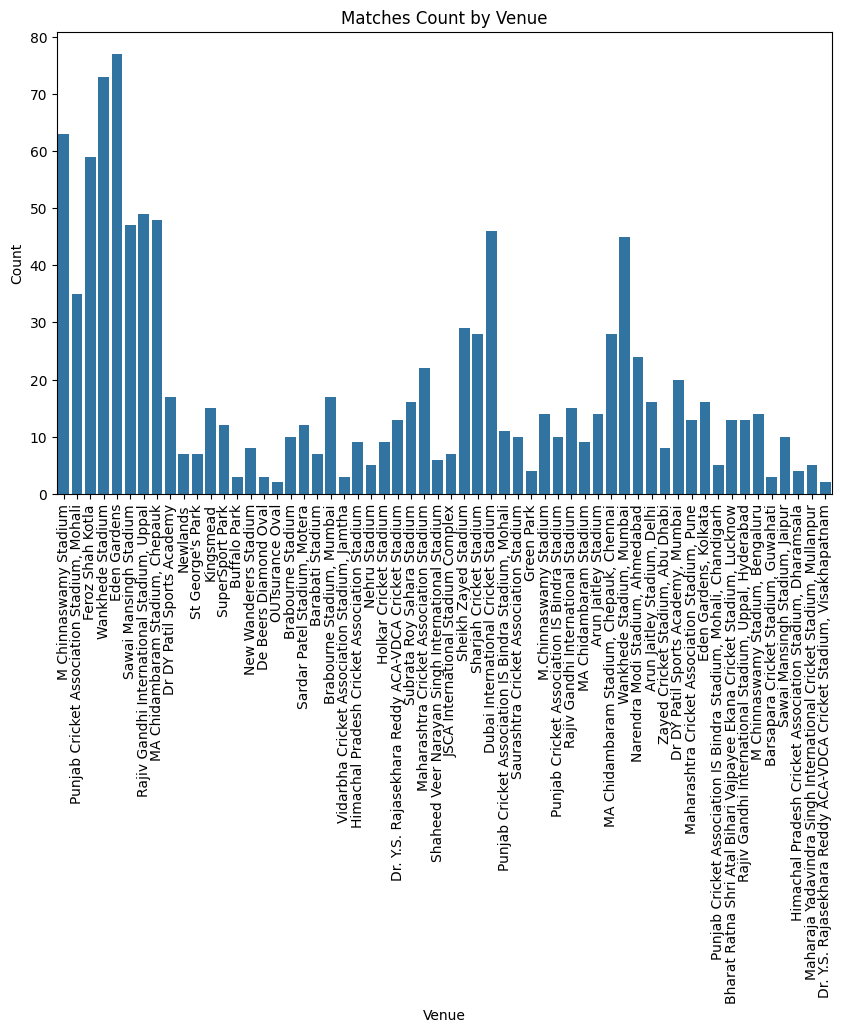

In [30]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's countplot to plot the number of matches played at each venue
# The 'x' parameter is set to 'venue', and 'data' specifies the DataFrame to use for plotting
sns.countplot(x='venue', data=data)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by Venue')

# Display the plot
plt.show()

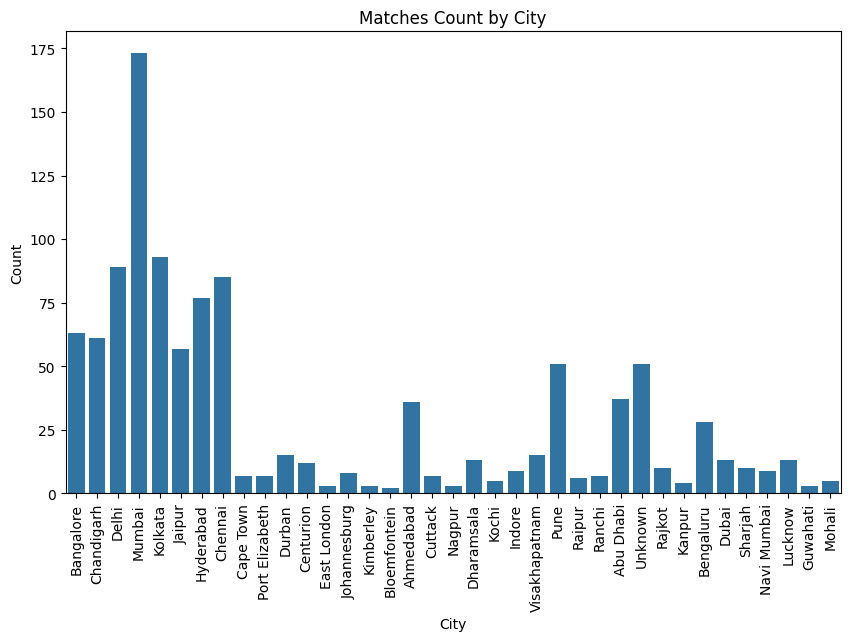

In [31]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's countplot to plot the number of matches played in each city
# The 'x' parameter is set to 'city', and 'data' specifies the DataFrame to use for plotting
sns.countplot(x='city', data=data)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('City')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by City')

# Display the plot
plt.show()

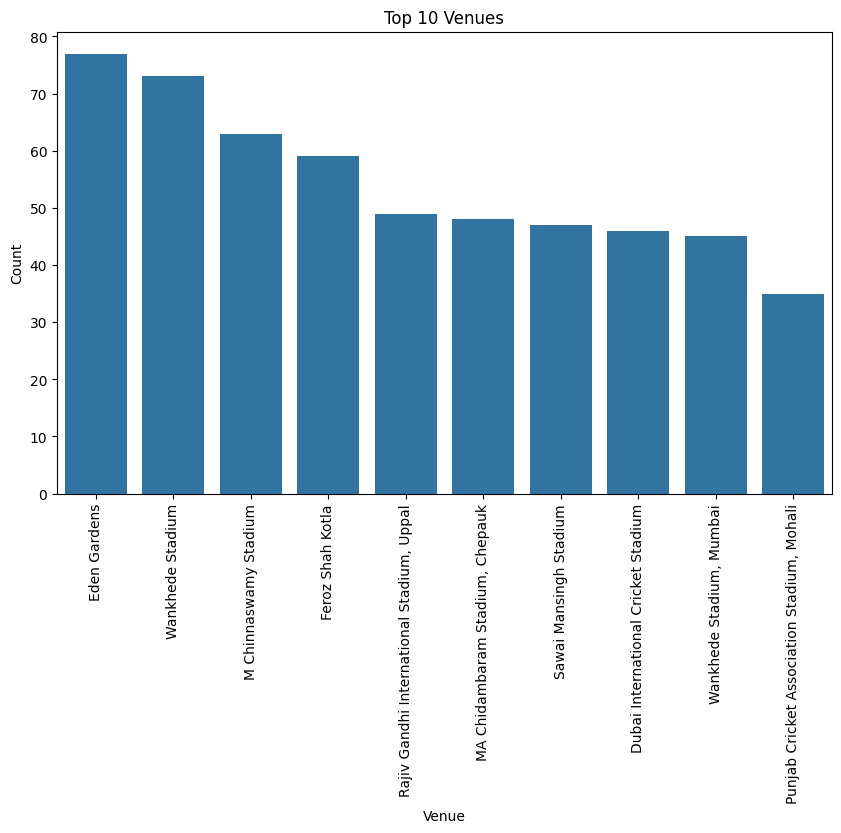

In [32]:
# Get the top 10 venues with the highest number of matches played
venue_counts = data['venue'].value_counts().head(10)

# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot to plot the count of matches for each of the top 10 venues
# The 'x' parameter is set to the venue names (index of venue_counts), and 'y' is set to the corresponding match counts (values of venue_counts)
sns.barplot(x=venue_counts.index, y=venue_counts.values)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Venues')

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

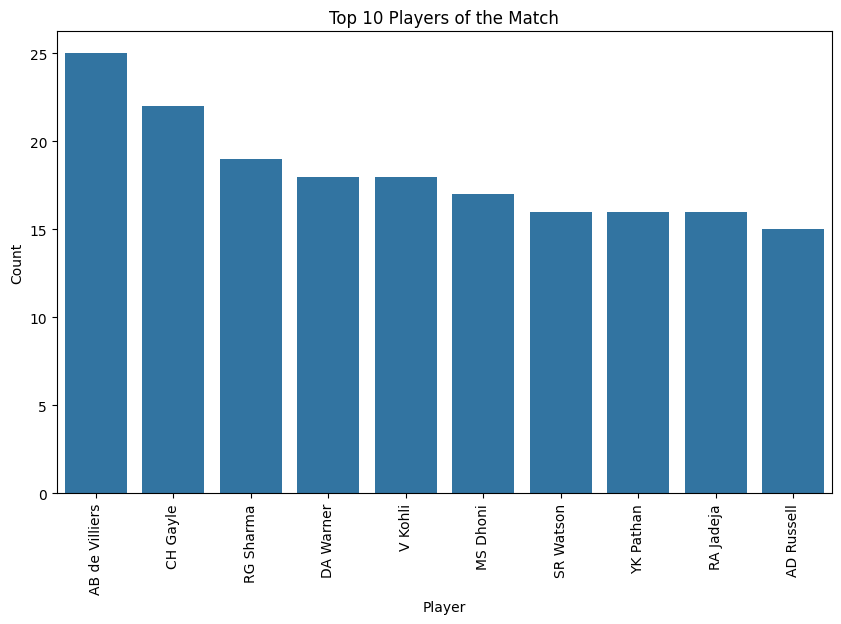

In [33]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Get the top 10 players with the highest number of "Player of the Match" awards
top_players = data['player_of_match'].value_counts().head(10)

# Use Seaborn's barplot to plot the count of "Player of the Match" awards for each of the top 10 players
# The 'x' parameter is set to the player names (index of top_players), and 'y' is set to the corresponding award counts (values of top_players)
sns.barplot(x=top_players.index, y=top_players.values)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Player')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Players of the Match')

# Display the plot
plt.show()


In [34]:
# Extracting day, month, and year from the 'date' column
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

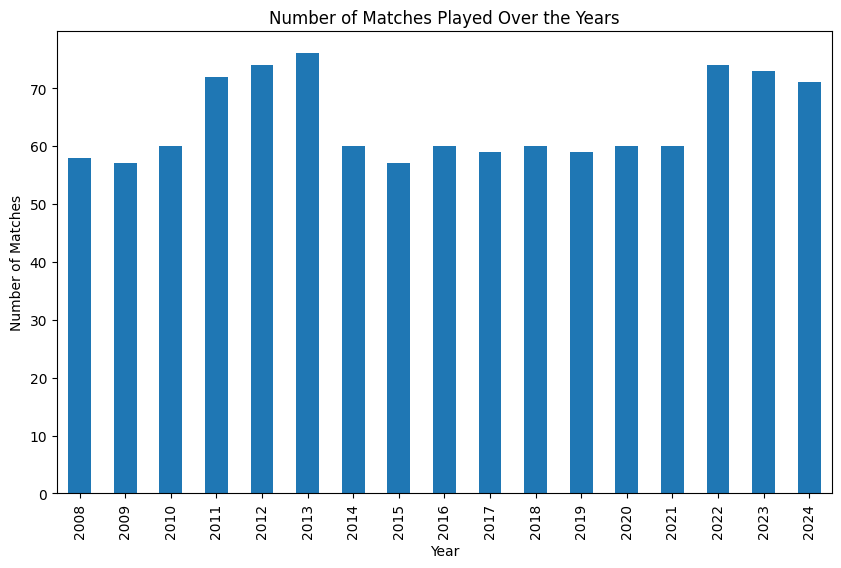

In [35]:
# Number of matches played over the years
plt.figure(figsize=(10, 6))
data['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played Over the Years')
plt.show()

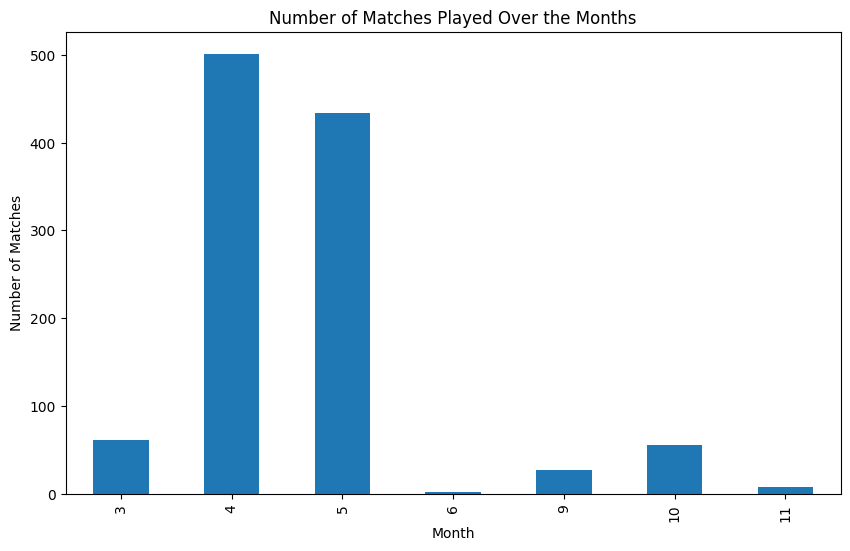

In [36]:
# Number of matches played over the months
plt.figure(figsize=(10, 6))
data['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played Over the Months')
plt.show()

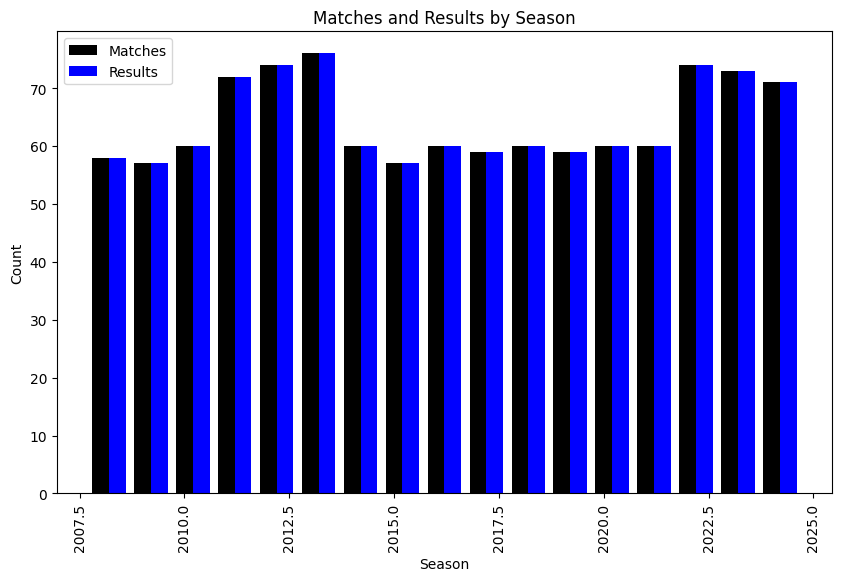

In [37]:
# Matches and Results by Season
season_matches = data['season'].value_counts()
season_results = data['winner'].groupby(data['season']).value_counts().unstack(fill_value=0)

# Plotting Matches and Results by Season
plt.figure(figsize=(10, 6))
bar_width = 0.4

plt.bar(season_matches.index, season_matches.values, width=bar_width, color='black', label='Matches')
plt.bar(season_results.index + bar_width, season_results.values.sum(axis=1), width=bar_width, color='blue', label='Results')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Matches and Results by Season')
plt.legend()
plt.xticks(rotation=90)
plt.show()


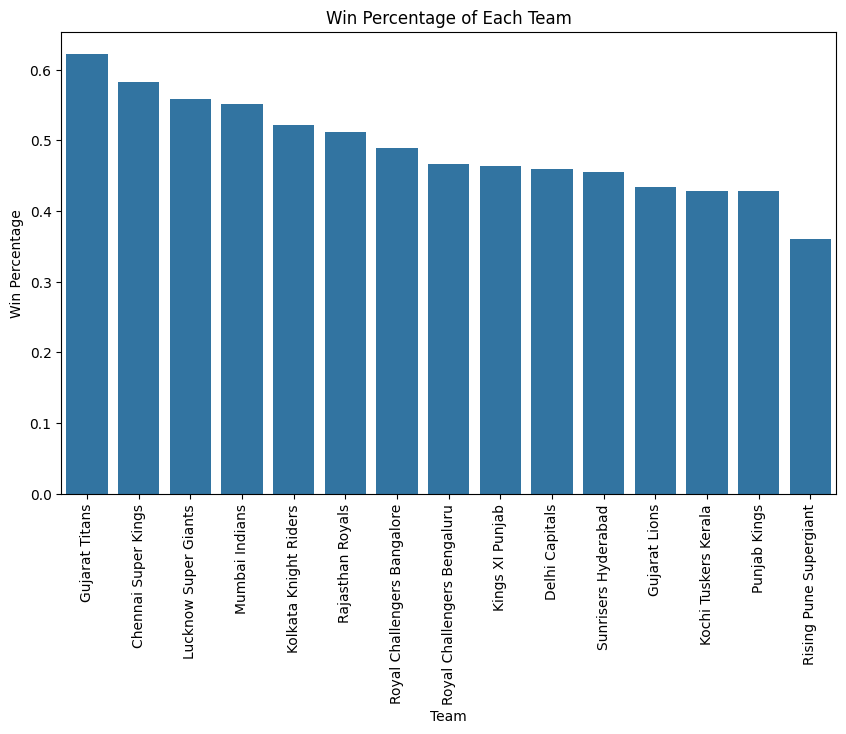

In [38]:
# Calculate win percentage for each team
team_wins = data['winner'].value_counts()
team_matches = data['team1'].value_counts() + data['team2'].value_counts()
win_percentage = (team_wins / team_matches).sort_values(ascending=False)

# Plot win percentage for each team
plt.figure(figsize=(10, 6))
sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
plt.show()


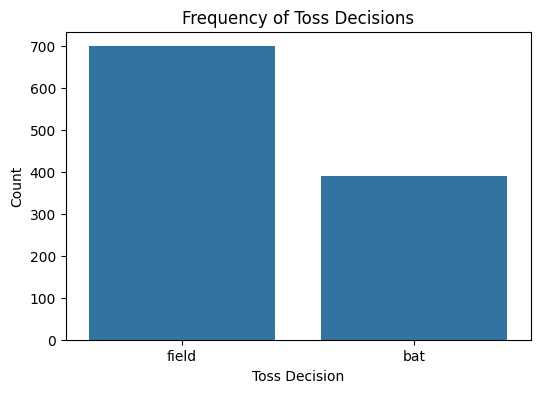

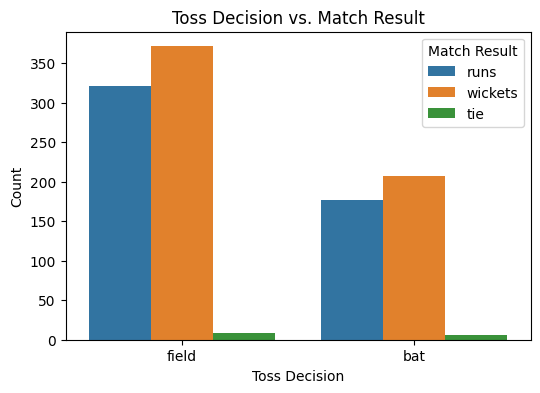

In [39]:
# Toss Decision Frequency
toss_decision_counts = data['toss_decision'].value_counts()

# Plot the frequency of toss decisions
plt.figure(figsize=(6, 4))
sns.countplot(x='toss_decision', data=data)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Frequency of Toss Decisions')
plt.show()

# Toss Decision vs. Match Result
plt.figure(figsize=(6, 4))
sns.countplot(x='toss_decision', hue='result', data=data)
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.title('Toss Decision vs. Match Result')
plt.legend(title='Match Result', loc='upper right')
plt.show()


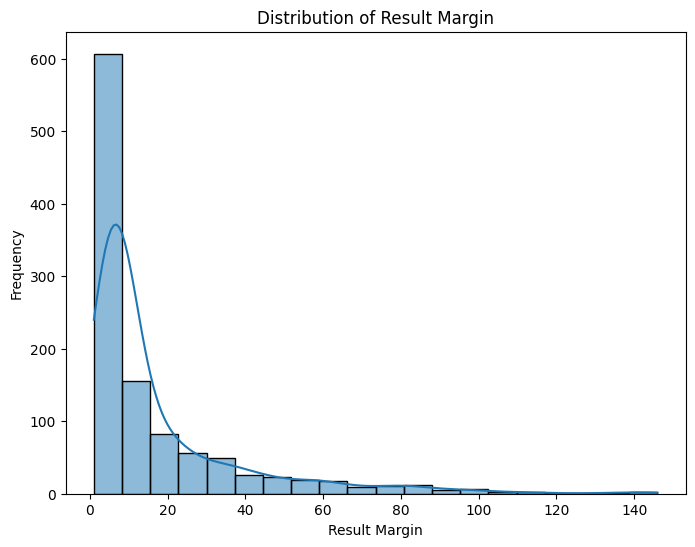

In [40]:
# Distribution of Result Margin
plt.figure(figsize=(8, 6))
sns.histplot(data['result_margin'], bins=20, kde=True)
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.title('Distribution of Result Margin')
plt.show()


C:\Users\Sherwin\AppData\Local\Temp\ipykernel_11876\3156037284.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='matches_umpired', y='umpire', data=umpire_counts, palette='viridis')


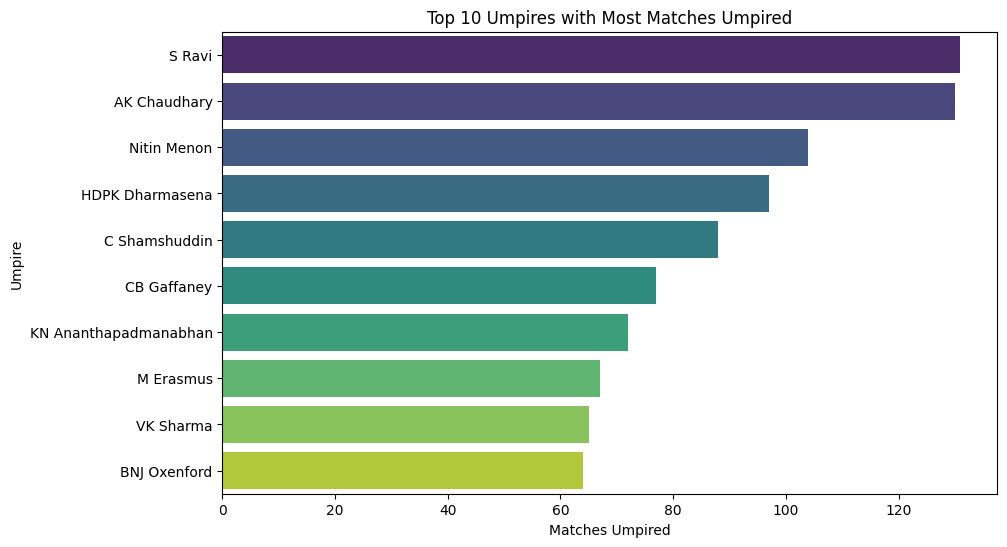

In [41]:
# Umpire-wise Analysis
umpire1_counts = data['umpire1'].value_counts().reset_index()
umpire1_counts.columns = ['umpire', 'matches_umpired']

umpire2_counts = data['umpire2'].value_counts().reset_index()
umpire2_counts.columns = ['umpire', 'matches_umpired']

# Combine counts from umpire1 and umpire2
umpire_counts = umpire1_counts.merge(umpire2_counts, on='umpire', how='outer')
umpire_counts['matches_umpired'] = umpire_counts['matches_umpired_x'].fillna(0) + umpire_counts['matches_umpired_y'].fillna(0)
umpire_counts = umpire_counts[['umpire', 'matches_umpired']]
umpire_counts = umpire_counts.sort_values(by='matches_umpired', ascending=False).head(10)

# Plotting Umpire-wise Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='matches_umpired', y='umpire', data=umpire_counts, palette='viridis')
plt.xlabel('Matches Umpired')
plt.ylabel('Umpire')
plt.title('Top 10 Umpires with Most Matches Umpired')
plt.show()


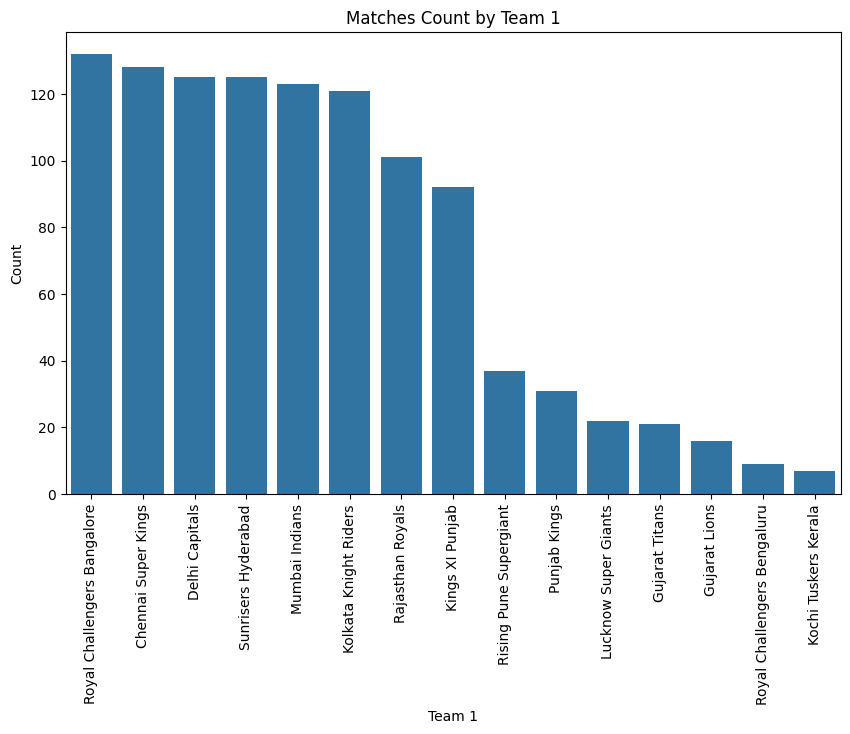

In [42]:

# Team 1
team1_counts = data['team1'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='team1', data=data, order=team1_counts.index)
plt.xlabel('Team 1')
plt.ylabel('Count')
plt.title('Matches Count by Team 1')
plt.xticks(rotation=90)
plt.show()

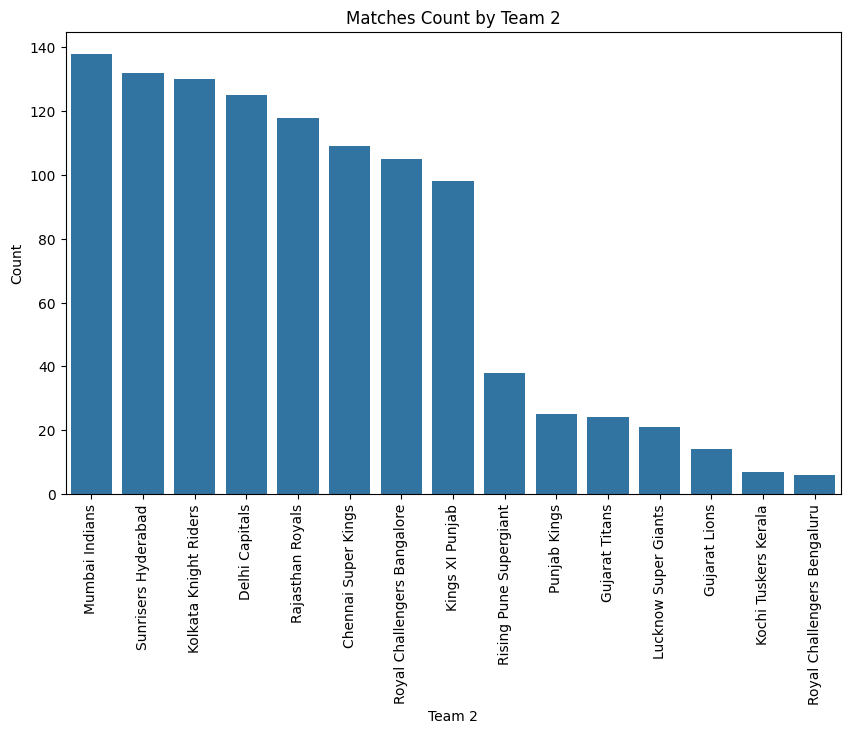

In [43]:
# Team 2
team2_counts = data['team2'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='team2', data=data, order=team2_counts.index)
plt.xlabel('Team 2')
plt.ylabel('Count')
plt.title('Matches Count by Team 2')
plt.xticks(rotation=90)
plt.show()

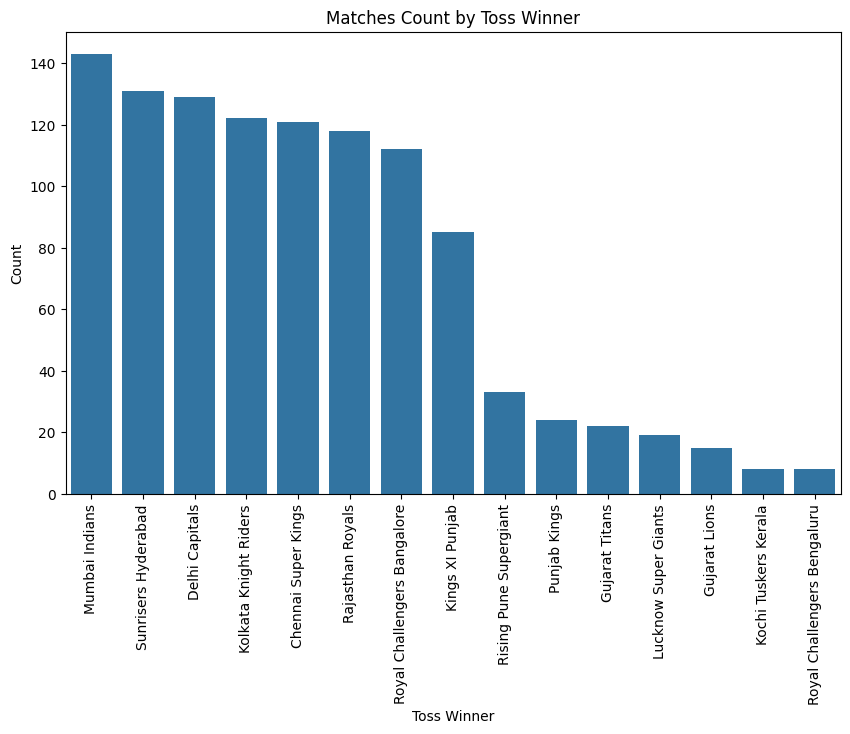

In [44]:
# Toss Winner
toss_winner_counts = data['toss_winner'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', data=data, order=toss_winner_counts.index)
plt.xlabel('Toss Winner')
plt.ylabel('Count')
plt.title('Matches Count by Toss Winner')
plt.xticks(rotation=90)
plt.show()

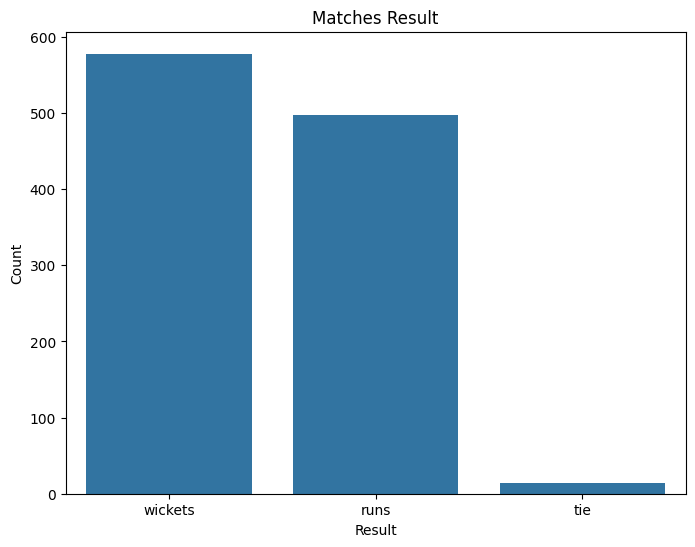

In [45]:
# Result
result_counts = data['result'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=data, order=result_counts.index)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Matches Result')
plt.show()

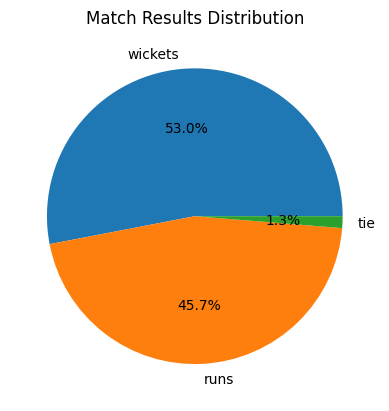

In [46]:
# Pie Chart
plt.pie(data['result'].value_counts(), labels=data['result'].value_counts().index, autopct='%1.1f%%')
plt.title('Match Results Distribution')
plt.show()

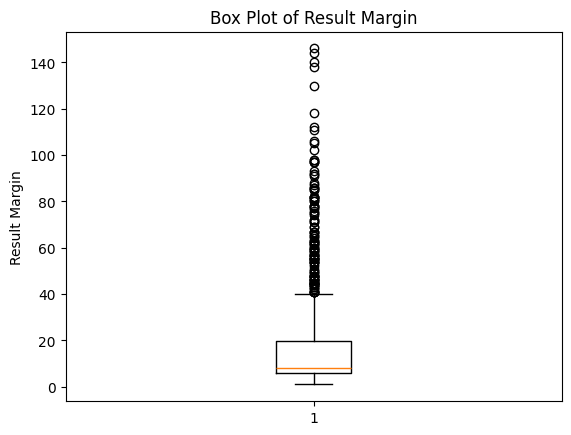

In [47]:
# Box Plot
plt.boxplot(data['result_margin'])
plt.ylabel('Result Margin')
plt.title('Box Plot of Result Margin')
plt.show()

In [48]:
# Cross-tabulation
cross_tab = pd.crosstab(data['team1'], data['winner'])
print(cross_tab)

winner                       Chennai Super Kings  Delhi Capitals  \
team1                                                              
Chennai Super Kings                           75               6   
Delhi Capitals                                 8              61   
Gujarat Lions                                  0               2   
Gujarat Titans                                 1               1   
Kings XI Punjab                                7               4   
Kochi Tuskers Kerala                           0               1   
Kolkata Knight Riders                         10               7   
Lucknow Super Giants                           0               1   
Mumbai Indians                                 7               5   
Punjab Kings                                   1               3   
Rajasthan Royals                               5               5   
Rising Pune Supergiant                         2               3   
Royal Challengers Bangalore                   10

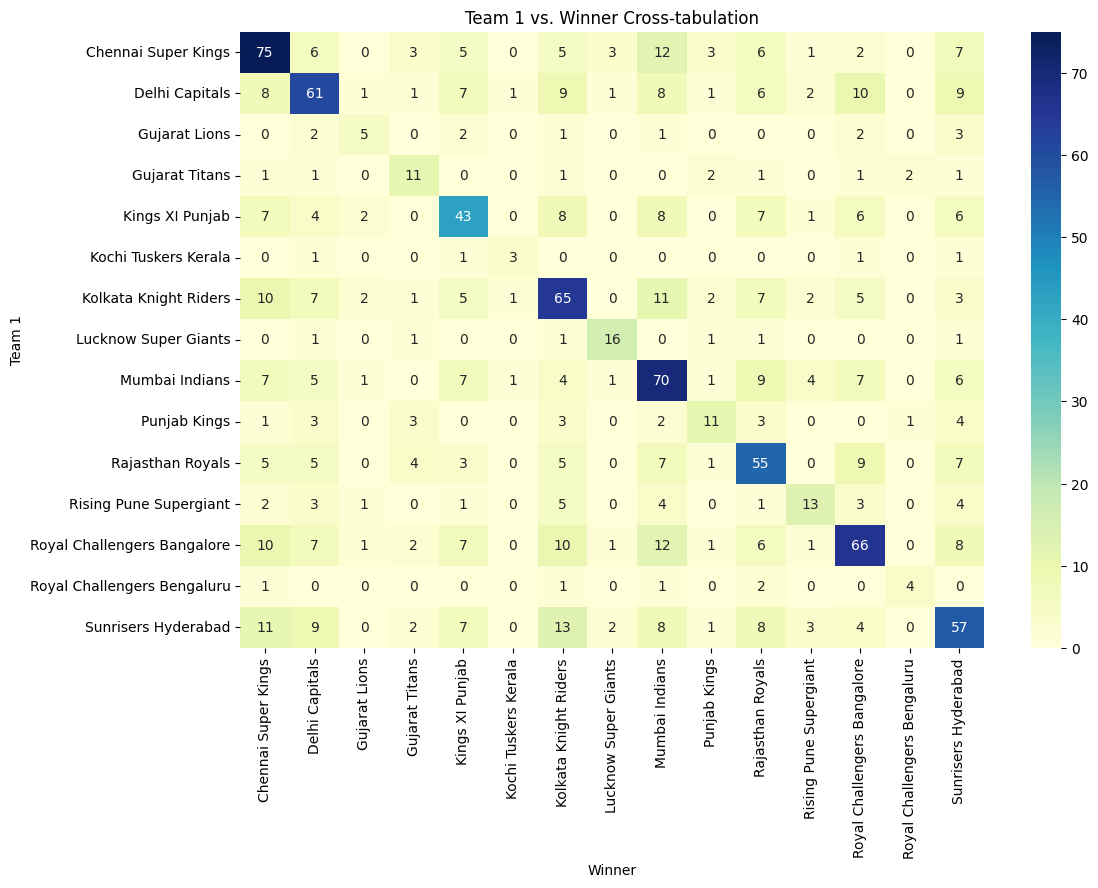

In [49]:
# Cross-tabulation
cross_tab = pd.crosstab(data['team1'], data['winner'])

# Plotting Heatmap for Cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Winner')
plt.ylabel('Team 1')
plt.title('Team 1 vs. Winner Cross-tabulation')
plt.show()


# **Data Preparation**

In [51]:
# To display the columns of the data
data.columns

Index(['season', 'city', 'date', 'match_type', 'player_of_match', 'venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs', 'target_overs', 'super_over', 'umpire1',
       'umpire2', 'day', 'month', 'year'],
      dtype='object')

In [52]:
## Get the unique venues present in the 'winner' column 
data['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Sunrisers Hyderabad', 'Mumbai Indians',
       'Rising Pune Supergiant', 'Kochi Tuskers Kerala', 'Gujarat Lions',
       'Punjab Kings', 'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

### **Mapping Categorical data into numerical form**
The purpose of this conversion is to transform the categorical data (team names) into numerical form, which is required for many machine learning algorithms that can only handle numerical data. By mapping team names to unique numbers, we can represent them as numerical features in the dataset, enabling us to use them in the model training process.

In [53]:
# Create a dictionary to map team names to unique numbers
team_mapping = {
    'Kolkata Knight Riders': 1,
    'Chennai Super Kings': 2,
    'Delhi Capitals': 3,
    'Royal Challengers Bangalore': 4,
    'Rajasthan Royals': 5,
    'Kings XI Punjab': 6,
    'Sunrisers Hyderabad': 7,
    'Mumbai Indians': 8,
    'Rising Pune Supergiant': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11
}

# Replace team names in 'team1' and 'team2' columns with unique numbers
data['team1'] = data['team1'].map(team_mapping)
data['team2'] = data['team2'].map(team_mapping)

# Replace winner names in 'winner' column with unique numbers
data['winner'] = data['winner'].map(team_mapping)
data['toss_winner'] = data['toss_winner'].map(team_mapping)



We create a dictionary team_mapping where each team name is mapped to a corresponding unique number. Then, we use the map function in Pandas to replace the team names in the 'team1', 'team2', 'winner', and 'toss_winner' columns with their respective unique numerical values.

In [54]:
# Get the unique venues present in the 'venue' column
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [55]:
# Create a dictionary to map each unique venue name to a unique number
venue_mapping = {venue: i for i, venue in enumerate(data['venue'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['venue'] = data['venue'].map(venue_mapping)

In [56]:
# Get the unique venues present in the 'toss_decsion' column
data['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [57]:
# Create a dictionary to map 'toss_decision' values to numerical values
temp = {'field': 0, 'bat': 1}

# Use the map() function to replace 'toss_decision' values with numerical values
data['toss_decision'] = data['toss_decision'].map(temp)

In [58]:
# Create a set of unique umpires
umpires_set = set(data['umpire1'].unique()).union(set(data['umpire2'].unique()))

# Create a dictionary to map umpire names to unique numbers
umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}

# Apply the dictionary to create new encoded columns for 'umpire1' and 'umpire2'
data['umpire1'] = data['umpire1'].map(umpire_dict)
data['umpire2'] = data['umpire2'].map(umpire_dict)


In [59]:
# Create a dictionary to map each unique venue name to a unique number
player_of_match_mapping = {venue: i for i, venue in enumerate(data['player_of_match'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['player_of_match'] = data['player_of_match'].map(player_of_match_mapping)

In [60]:
# Create a dictionary to map each unique venue name to a unique number
city_mapping = {venue: i for i, venue in enumerate(data['city'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['city'] = data['city'].map(city_mapping)

In [61]:
# to display our data
data.head()

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,day,month,year
0,2008,0,2008-04-18,League,0,0,4.0,1.0,4.0,0,...,runs,140.0,223.0,20.0,N,70,68,18,4,2008
1,2008,1,2008-04-19,League,1,1,6.0,2.0,2.0,1,...,runs,33.0,241.0,20.0,N,39,47,19,4,2008
2,2008,2,2008-04-19,League,2,2,3.0,5.0,5.0,1,...,wickets,9.0,130.0,20.0,N,22,29,19,4,2008
3,2008,3,2008-04-20,League,3,3,8.0,4.0,8.0,1,...,wickets,5.0,166.0,20.0,N,34,59,20,4,2008
4,2008,4,2008-04-20,League,4,4,1.0,7.0,7.0,1,...,wickets,5.0,111.0,20.0,N,10,35,20,4,2008


In [63]:
# Print the columns of your DataFrame to verify their names and availability
print("Columns in DataFrame:", data.columns)

# Update unwanted_columns to include only existing columns
unwanted_columns = ['date', 'result', 'season', 'day', 'month', 'year']  # Adjust based on your DataFrame

# Drop the unwanted columns from the DataFrame
data.drop(columns=unwanted_columns, inplace=True)


Columns in DataFrame: Index(['season', 'city', 'date', 'match_type', 'player_of_match', 'venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs', 'target_overs', 'super_over', 'umpire1',
       'umpire2', 'day', 'month', 'year'],
      dtype='object')


In [64]:
data.head()

,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,0,League,0,0,4.0,1.0,4.0,0,1.0,140.0,223.0,20.0,N,70,68
1,1,League,1,1,6.0,2.0,2.0,1,2.0,33.0,241.0,20.0,N,39,47
2,2,League,2,2,3.0,5.0,5.0,1,3.0,9.0,130.0,20.0,N,22,29
3,3,League,3,3,8.0,4.0,8.0,1,4.0,5.0,166.0,20.0,N,34,59
4,4,League,4,4,1.0,7.0,7.0,1,1.0,5.0,111.0,20.0,N,10,35


<Axes: >

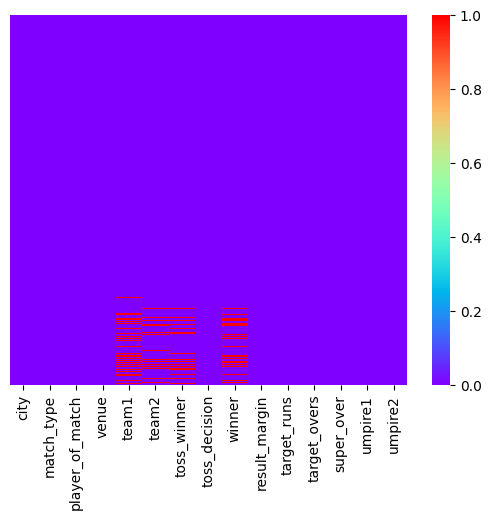

In [65]:
# checking for the null values in updated dataframe
sns.heatmap(data.isnull(),cmap='rainbow',yticklabels=False)

# **Splitting our data**

In [77]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['winner'], axis=1)
y = data['winner']

In [76]:
    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Display the shapes of the training and testing sets
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)

X_train shape: (760, 14)
y_train shape: (760,)
X_test shape: (190, 14)
y_test shape: (190,)


In [78]:
print(data.columns)


Index(['city', 'match_type', 'player_of_match', 'venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result_margin',
       'target_runs', 'target_overs', 'super_over', 'umpire1', 'umpire2'],
      dtype='object')


In [79]:
# Check which columns are present in the DataFrame
print(data.columns)

cols_to_fill = ['player_of_match', 'result_margin']  # Adjust based on your dataset

# Fill missing values in specific columns with a placeholder ('Not Available' or similar)
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')


# Drop any remaining rows with missing values (if applicable)
data.dropna(inplace=True)


Index(['city', 'match_type', 'player_of_match', 'venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result_margin',
       'target_runs', 'target_overs', 'super_over', 'umpire1', 'umpire2'],
      dtype='object')


In [80]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['winner'], axis=1)
y = data['winner']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (760, 14)
y_train shape: (760,)
X_test shape: (190, 14)
y_test shape: (190,)


In [82]:
data.dropna(inplace=True)


In [84]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['winner'], axis=1)
y = data['winner']


In [85]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['winner'], axis=1)
y = data['winner']


In [86]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already split and loaded

# Define categorical columns (adjust based on your actual dataset)
categorical_cols = ['city', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 
                    'toss_winner', 'toss_decision', 'umpire1', 'umpire2']

# Define preprocessing steps for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=500, random_state=1))])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Assuming X_test and y_test are used for evaluation or further prediction


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'match_type',
                                                   'player_of_match', 'venue',
                                                   'team1', 'team2',
                                                   'toss_winner',
                                                   'toss_decision', 'umpire1',
                                                   'umpire2'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=500, random_state=1))])

# **Identifying Important features**

In [92]:
# Fit and transform the training data using the ColumnTransformer
X_train_transformed = preprocessor.fit_transform(X_train)

# Get the transformed feature names from the ColumnTransformer
transformed_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Print the transformed feature names
print("Transformed Features:")
print(transformed_feature_names)


Transformed Features:
['city_0' 'city_1' 'city_2' 'city_3' 'city_4' 'city_5' 'city_6' 'city_7'
 'city_8' 'city_9' 'city_10' 'city_11' 'city_12' 'city_13' 'city_14'
 'city_15' 'city_16' 'city_17' 'city_18' 'city_19' 'city_20' 'city_21'
 'city_22' 'city_23' 'city_24' 'city_25' 'city_26' 'city_27' 'city_28'
 'city_29' 'city_30' 'city_31' 'city_32' 'city_33' 'city_35'
 'match_type_3rd Place Play-Off' 'match_type_Elimination Final'
 'match_type_Eliminator' 'match_type_Final' 'match_type_League'
 'match_type_Qualifier 1' 'match_type_Qualifier 2' 'match_type_Semi Final'
 'player_of_match_0' 'player_of_match_1' 'player_of_match_2'
 'player_of_match_3' 'player_of_match_4' 'player_of_match_5'
 'player_of_match_6' 'player_of_match_7' 'player_of_match_8'
 'player_of_match_9' 'player_of_match_10' 'player_of_match_11'
 'player_of_match_12' 'player_of_match_13' 'player_of_match_14'
 'player_of_match_15' 'player_of_match_16' 'player_of_match_17'
 'player_of_match_18' 'player_of_match_19' 'player_of_ma

In [94]:
# Create an instance of the RandomForestClassifier with hyperparameters
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the RandomForestClassifier on the transformed training data
forest.fit(X_train_transformed, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [95]:
# Get the feature importances from the trained RandomForestClassifier
importances = forest.feature_importances_

# Loop over each feature and its importance
for i in range(X_train.shape[1]):
    # Print the feature number, name, and importance score
    print("%2d) %-*s %f" % (i + 1, 30, data.columns[i], importances[i]))

 1) city                           0.003829
 2) match_type                     0.005760
 3) player_of_match                0.005464
 4) venue                          0.009367
 5) team1                          0.008586
 6) team2                          0.007388
 7) toss_winner                    0.006587
 8) toss_decision                  0.008456
 9) winner                         0.000585
10) result_margin                  0.001015
11) target_runs                    0.001487
12) target_overs                   0.001213
13) super_over                     0.000396
14) umpire1                        0.001056


# **Training our Model**

### **1. Logistic Regression**

In [105]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(classification_report(y_test, y_pred_log_reg))

NameError: name 'X_train_scaled' is not defined

In [65]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.26993865030674846


### **2. SVM**

In [98]:
# Initialize the logistic regression model
model = SVC()

# Train the model on the training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'League'

In [67]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.17177914110429449


### **3. Random Forest** 

In [99]:
# Initialize the logistic regression model
model = RandomForestClassifier(n_estimators=13)

# Train the model on the training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'League'

In [69]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6196319018404908


### **4. LGBMClassifier**

In [70]:
# Create an instance of the LGBMClassifier model
model = lgb.LGBMClassifier(
    boosting_type='gbdt',       # The type of boosting algorithm to use ('gbdt': Gradient Boosting Decision Tree)
    num_leaves=31,              # Number of leaves in one tree (default: 31)
    max_depth=-1,               # Maximum tree depth for base learners (-1 means no limit, default: -1)
    learning_rate=0.1,          # Learning rate or shrinkage rate to prevent overfitting (default: 0.1)
    n_estimators=100            # Number of boosting iterations (default: 100)
)

# Fit the model on the training data
model.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 11
[LightGBM] [Info] Start training from score -2.044616
[LightGBM] [Info] Start training from score -2.093406
[LightGBM] [Info] Start training from score -2.270740
[LightGBM] [Info] Start training from score -2.093406
[LightGBM] [Info] Start training from score -2.285778
[LightGBM] [Info] Start training from score -2.226937
[LightGBM] [Info] Start training from score -2.068713
[LightGBM] [Info] Start training from score -2.068713
[LightGBM] [Info] Start training from score -3.339939
[LightGBM] [Info] Start training from score -4.865995
[LightGBM] [Info] Start training from score -4.172848
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

LGBMClassifier()

In [71]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6871165644171779


# **Buidling a predictive system**

In [72]:
# Function to get user input for prediction
def get_user_input():
    City = input("Enter the city: ")
    Player_of_match = input("Enter the player of the match: ")
    Venue = input("Enter the venue: ")
    Neutral_venue = int(input("Is it a neutral venue? (0 for No, 1 for Yes): "))
    Team1 = input("Enter the first team: ")
    Team2 = input("Enter the second team: ")
    Toss_winner = input("Enter the toss winner: ")
    Toss_decision = input("Enter the toss decision (bat or field): ")
    Result_margin = float(input("Enter the result margin: "))
    Umpire1 = input("Enter the name of the first umpire: ")
    Umpire2 = input("Enter the name of the second umpire: ")


    # Display the user input and win probability for Team 1
    print("\n\nUser Input:")
    print(f"City: {City}")
    print(f"Player of the Match: {Player_of_match}")
    print(f"Venue: {Venue}")
    print(f"Neutral Venue: {'Yes' if Neutral_venue == 1 else 'No'}")
    print(f"Team 1: {Team1}")
    print(f"Team 2: {Team2}")
    print(f"Toss Winner: {Toss_winner}")
    print(f"Toss Decision: {Toss_decision}")
    print(f"Umpire1: {Umpire1}")
    print(f"Umpire2: {Umpire2}")
    print("\n")

    # Map user input to numerical forms based on the mappings
    city_numeric = city_mapping.get(City, -1)
    player_of_match_numeric = player_of_match_mapping.get(Player_of_match, -1)
    venue_numeric = venue_mapping.get(Venue, -1)
    team1_numeric = team_mapping.get(Team1,-1)
    team2_numeric = team_mapping.get(Team2,-1)
    toss_winner_numeric = team_mapping.get(Toss_winner,-1)
    toss_decision_numeric = temp.get(Toss_decision,-1)
    umpire1_numeric = umpire_dict.get(Umpire1,-1)
    umpire2_numeric = umpire_dict.get(Umpire2,-1)

    user_data = pd.DataFrame({
        'city': [city_numeric],
        'player_of_match': [player_of_match_numeric],
        'venue': [venue_numeric],
        'neutral_venue': [Neutral_venue],
        'team1': [team1_numeric],
        'team2': [team2_numeric],
        'toss_winner': [toss_winner_numeric],
        'toss_decision': [toss_decision_numeric],
        'result_margin': [Result_margin],
        'umpire1': [umpire1_numeric],
        'umpire2': [umpire2_numeric]
    })

    return user_data

In [73]:
# Function to make predictions on user input
def make_predictions(user_data):
    # Make predictions on the user input data
    predictions = model.predict(user_data)

    # Get the probability of winning for the 1st team (team1)
    win_probability_team1 = predictions[0]

    # Convert probability to percentage
    win_probability_percentage_team1 = win_probability_team1 * 10

    return win_probability_percentage_team1

In [74]:
# Main function to run the predictive system
def main():
    print("Welcome to the IPL Match Winner Predictor!")

    while True:
        user_data = get_user_input()
        win_probability_team1 = make_predictions(user_data)

        # Display the win probability for the 1st team (team1)
        print(f"Win Probability for Team 1: {win_probability_team1:.2f}%")

        # Ask if the user wants to make another prediction
        another_prediction = input("Do you want to make another prediction? (yes or no): ")
        if another_prediction.lower() != 'yes':
            break

    print("\n\nThank you for using the IPL Match Winner Predictor!")

if __name__ == "__main__":
    main()

Welcome to the IPL Match Winner Predictor!


User Input:
City: Jaipur
Player of the Match: SR Watson
Venue: Sawai Mansingh Stadium
Neutral Venue: No
Team 1: Rajasthan Royals
Team 2: Delhi Daredevils
Toss Winner: Delhi Daredevils
Toss Decision: bat
Umpire1: Aleem Dar
Umpire2: RB Tiffin


Win Probability for Team 1: 50.00%


Thank you for using the IPL Match Winner Predictor!
